In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


We are going to work first with df_hour which has 17379 entries, against 731 of df_day and has one more column, hr.

## Preparing data  

In order to make machine learning predictions, we must do some adjustments in data:  

- Drop unnecessary data: instant (acts as ID), dteday (not necessary), casual and registered (dependent variable to target)
- Convert categorical variable into dummy variables: season, month, hour, weekday, weathersit

In [7]:
df_prepared = df_hour.copy()

In [8]:
df_prepared.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [9]:
columns = ['season','mnth','hr','weekday','weathersit']
df_prepared_dummies = pd.get_dummies(df_prepared, columns=columns)

In [10]:
df_prepared_dummies.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [11]:
len(df_prepared_dummies.columns)

59

In [12]:
df_prepared_dummies

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.2879,0.81,0.0000,16,1,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0000,40,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0000,32,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0000,13,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0000,1,1,0,...,0,0,0,0,0,1,1,0,0,0
5,0,0,0,0.24,0.2576,0.75,0.0896,1,1,0,...,0,0,0,0,0,1,0,1,0,0
6,0,0,0,0.22,0.2727,0.80,0.0000,2,1,0,...,0,0,0,0,0,1,1,0,0,0
7,0,0,0,0.20,0.2576,0.86,0.0000,3,1,0,...,0,0,0,0,0,1,1,0,0,0
8,0,0,0,0.24,0.2879,0.75,0.0000,8,1,0,...,0,0,0,0,0,1,1,0,0,0
9,0,0,0,0.32,0.3485,0.76,0.0000,14,1,0,...,0,0,0,0,0,1,1,0,0,0


## EDA - Exploratory Data Analysis

Let's see some caracteristics of our data using some plots

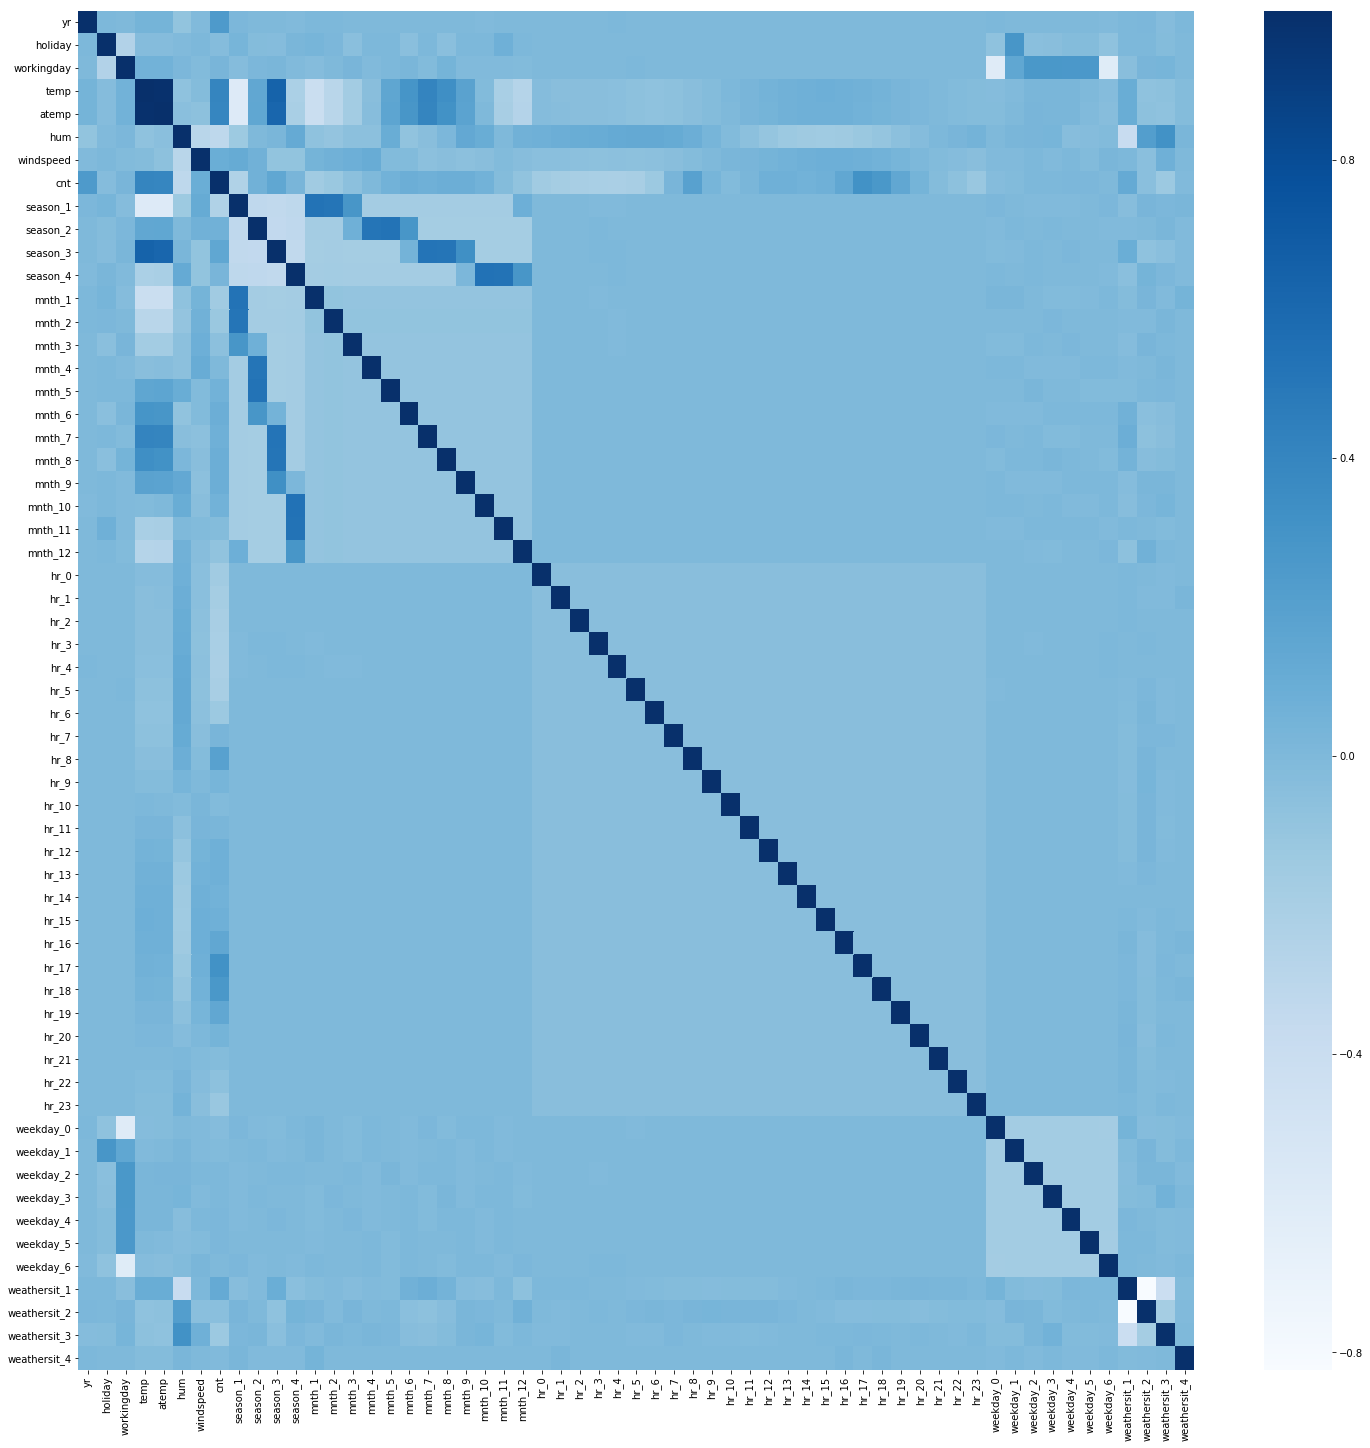

In [13]:
#Plotting heatmap
plt.figure(figsize=[25,25])
sns.heatmap(df_prepared_dummies.corr(), cmap="Blues")

<BarContainer object of 59 artists>

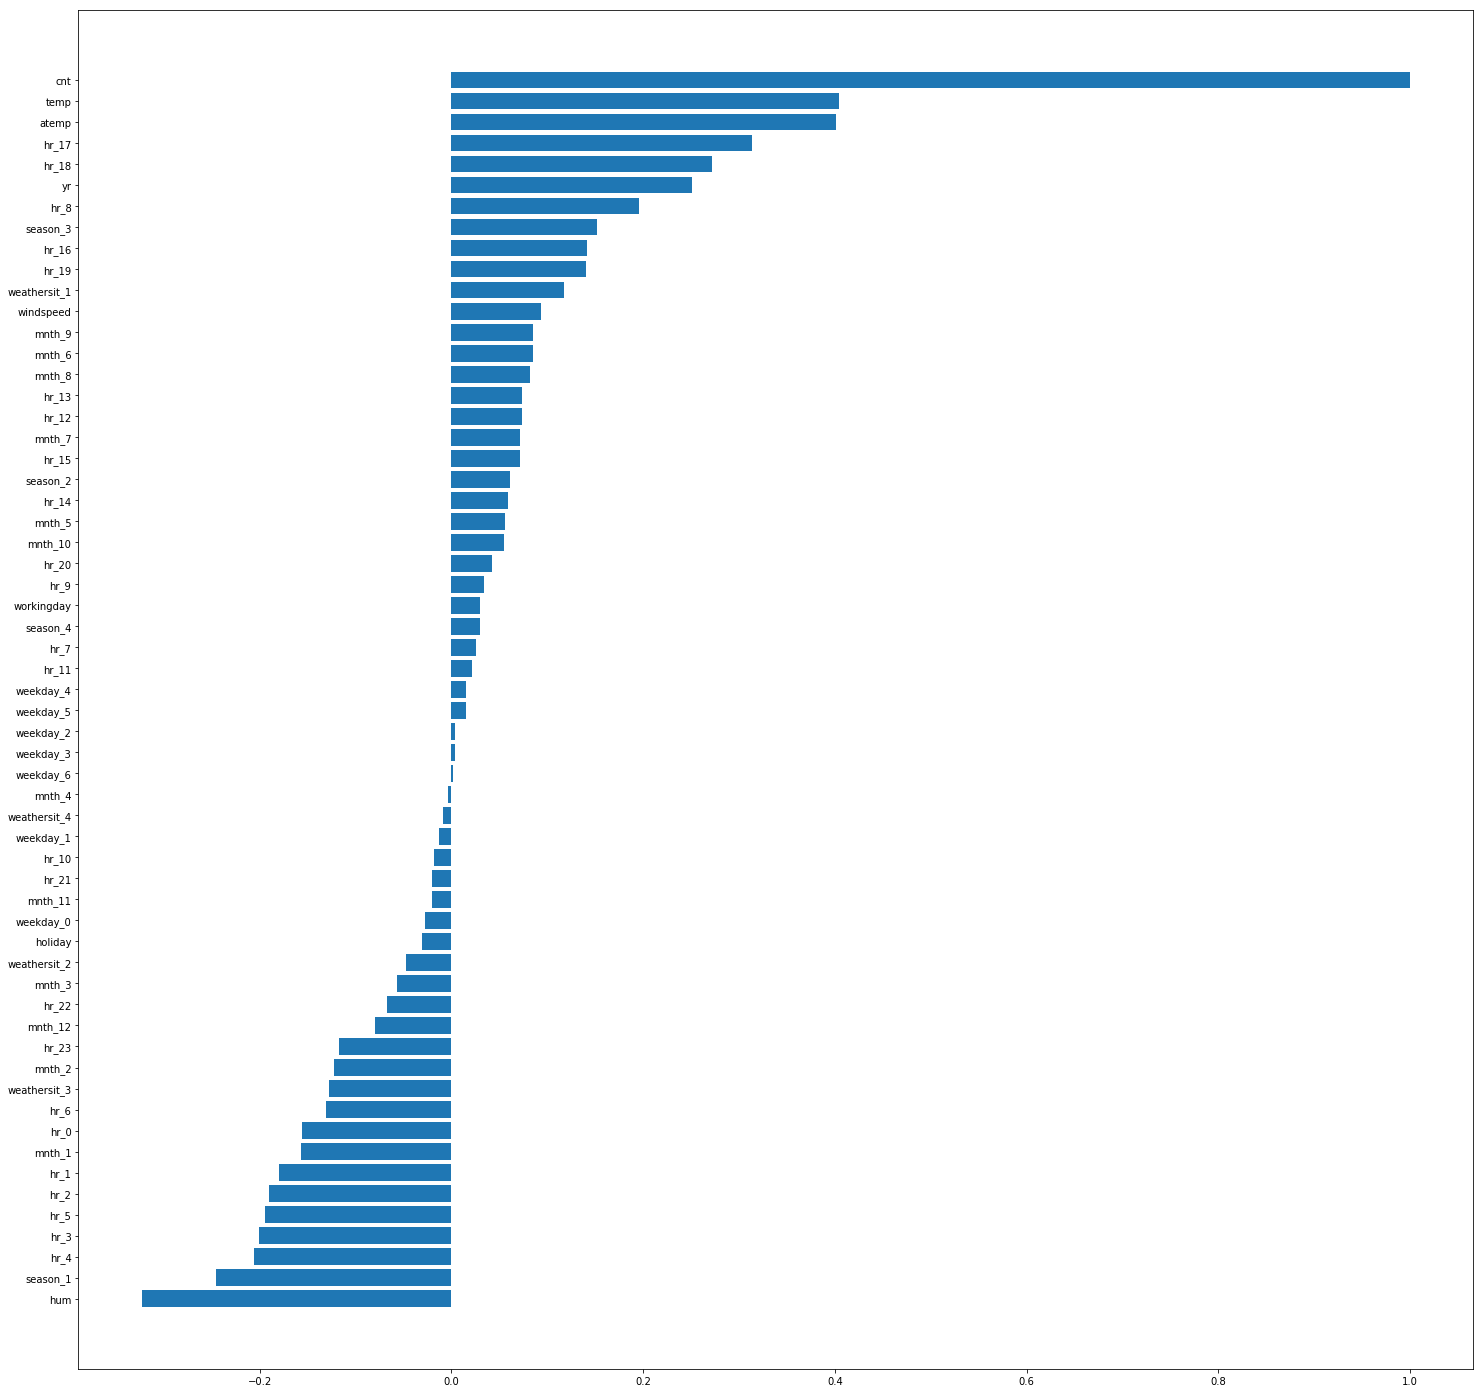

In [14]:
#Plotting correlation to our target variable (cnt)
plt.figure(figsize=[25,25])
correlation_to_cnt = df_prepared_dummies.corr()['cnt']
correlation_to_cnt = correlation_to_cnt.sort_values(ascending=True)
plt.barh(correlation_to_cnt.keys(), correlation_to_cnt.values)

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [16]:
df_prepared_dummies.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [17]:
y = df_prepared_dummies['cnt']

In [18]:
X = df_prepared_dummies.drop(['cnt'], axis=1)

In [35]:
kbest = SelectKBest(f_regression)
pipeline = Pipeline([('kbest', kbest), ('clf', linear_model.LinearRegression())])
all_k = range(1,58)
grid_search = GridSearchCV(pipeline, {'kbest__k': all_k})
grid_search.fit(X, y)

results = grid_search.cv_results_
print(results['mean_test_score'])

/home/ricardo/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[-0.01294774 -0.0164361   0.03737634  0.05704521  0.12007019  0.15021805
  0.18169177  0.19888096  0.23403819  0.25442091  0.28454082  0.29860815
  0.43212148  0.44913931  0.45910993  0.46095993  0.47794887  0.48034099
  0.52463607  0.53458095  0.54117159  0.54990145  0.55238867  0.56256242
  0.5687392   0.57069843  0.56966208  0.56969203  0.57033688  0.57161032
  0.57703163  0.57788175  0.57893419  0.58035854  0.57892657  0.58191553
  0.58190615  0.58249069  0.58093468  0.5806392   0.57724732  0.57901796
  0.57939751  0.58026766  0.58085197  0.58025074  0.58069292  0.58059546
  0.58059809  0.58078003  0.580685    0.58069709  0.58124005  0.5815592
  0.58156252  0.58092616  0.5802967 ]


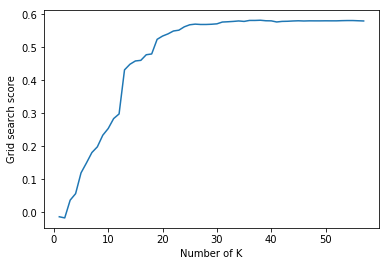

In [37]:
plt.plot(all_k, results['mean_test_score'])
plt.xlabel('Number of K')
plt.ylabel('Grid search score')
plt.show()

In [ ]:
df_prepared_dummies.to_csv('cleaned_data.csv', sep=',')